<a href="https://colab.research.google.com/github/100495829/Practica_AA_Clusters/blob/main/Practica_AA_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIEMBROS DEL GRUPO

*   Víctor Martínez de las Heras (100495829@alumnos.uc3m.es)
*   Mario Ramos Salsón (100495849@alumnos.uc3m.es)

# COMPROBACIÓN VISUAL DE LOS SCALERS

A continuación, se elaborarán tres gráficos, cada uno utilizando un tipo distinto de escalador, MinMaxScaler, RobustScaler y StandardScaler, con el propósito de visualizar cuál de ellos ofrece un mejor rendimiento. Para ello, se empleará el método de Principal Component Analysis (PCA).

Adicionalmente, se presentará la varianza explicada por las dos primeras componentes principales en cada caso, dado que este indicador refleja el porcentaje de información original del conjunto de datos que se conserva tras la reducción dimensional. A mayor varianza explicada, mejor será la representación de los datos en el espacio reducido, facilitando así una interpretación más precisa y útil para análisis posteriores.

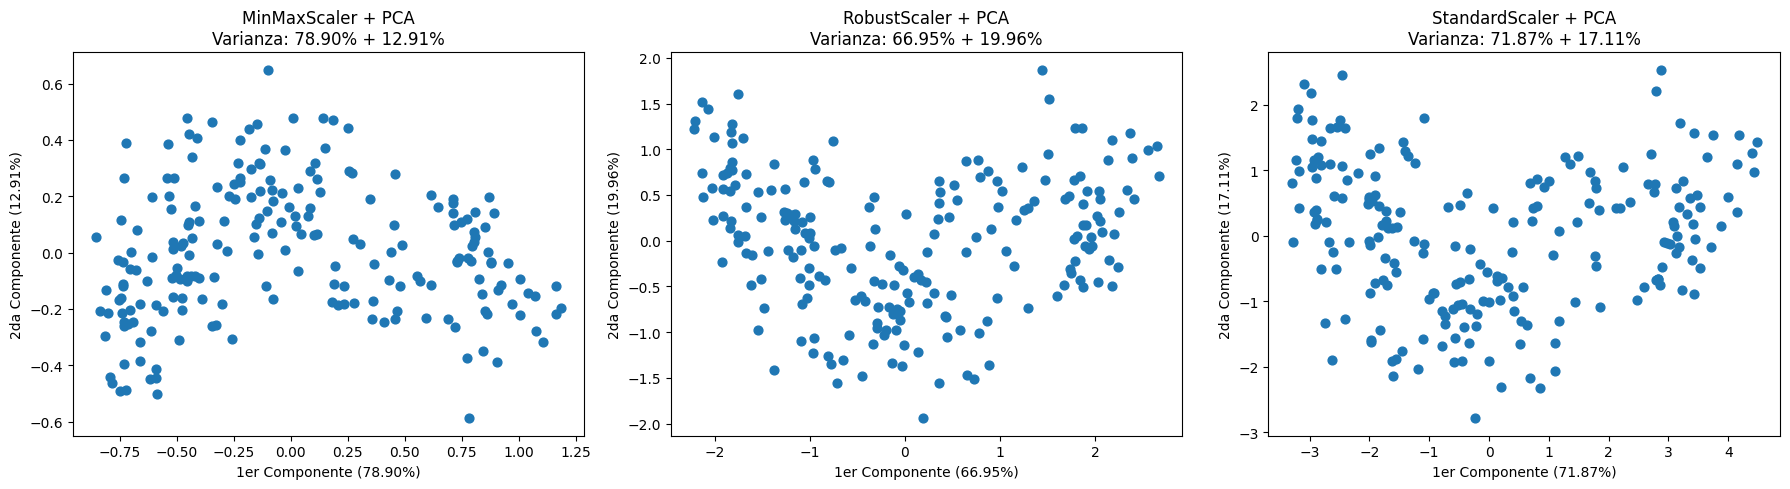

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

data = pd.read_csv('semillas.csv')
X = data.drop(columns=['clase'])

scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2))
    ])
    X_transformed = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']
    explained_variance = pca.explained_variance_ratio_

    # Gráfico de dispersión
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], s=40)
    ax.set_title(f'{name} + PCA\nVarianza: {explained_variance[0]:.2%} + {explained_variance[1]:.2%}')
    ax.set_xlabel(f'1er Componente ({explained_variance[0]:.2%})')
    ax.set_ylabel(f'2da Componente ({explained_variance[1]:.2%})')

plt.tight_layout()
plt.show()

Al comparar los tres métodos de escalado antes de aplicar el análisis de componentes principales (PCA), notamos algunas diferencias importantes.

El MinMaxScaler logra captar la mayor cantidad de varianza, es decir, conserva más información original del conjunto de datos (91.81%). Sin embargo, los valores resultantes quedan bastante compactos, concentrados en un rango pequeño (entre aproximadamente -0.75 y 1.25). Esto puede dificultar que se distingan bien las diferencias y patrones en los datos.

Por otro lado, el RobustScaler explica un poco menos de varianza (86.91%) y sus valores tienen un rango más amplio que el MinMaxScaler, pero no tan grande como el siguiente método.

Finalmente, el StandardScaler conserva un buen porcentaje de varianza (88.98%) y además genera un rango más amplio en las componentes principales (de aproximadamente -3 a 4). Esto quiere decir que los datos quedan más dispersos en el espacio reducido, lo que facilita que se identifiquen estructuras y relaciones dentro de ellos.

Por eso, aunque MinMaxScaler retiene un poco más de información, elegimos StandardScaler porque la mayor dispersión de los datos nos permite ver mejor las diferencias y patrones importantes. En resumen, StandardScaler ofrece un equilibrio ideal: mantiene bastante información y, al mismo tiempo, distribuye mejor los datos para un análisis más claro y útil.

# COMPARACIÓN ENTRE K-MEANS, HIERARCHICAL CLUSTERING Y DBSCAN

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

X_pca = pipeline.fit_transform(X)

## K MEANS

 A continuación, se aplicará el método de agrupamiento KMeans para segmentar los datos en distintos grupos o clusters. Para determinar cuál es el número óptimo de clusters, utilizaremos dos técnicas complementarias: el método del codo y el índice de la silueta.

El método del codo se basa en calcular la suma de las distancias al cuadrado dentro de cada cluster, conocida como inercia, para diferentes cantidades de clusters. Al graficar esta inercia en función del número de clusters, buscamos un punto donde la reducción en la inercia deje de ser significativa, formando una especie de “codo”. Este punto indica el número ideal de clusters, ya que agregar más grupos a partir de ahí no mejora considerablemente la agrupación.

Por otro lado, el índice de la silueta evalúa la calidad de los clusters midiendo qué tan bien separados y compactos están los puntos dentro de cada grupo. Este índice toma valores entre -1 y 1: valores cercanos a 1 indican clusters bien definidos y separados, mientras que valores cercanos a 0 o negativos señalan agrupaciones pobres o solapadas. Así, el número óptimo de clusters será aquel que maximice el valor promedio del índice de la silueta, garantizando una mejor separación y cohesión de los grupos.

La combinación de estas dos técnicas nos permite elegir un número de clusters que equilibra la compactación interna y la separación externa, facilitando una segmentación más efectiva y representativa de los datos.


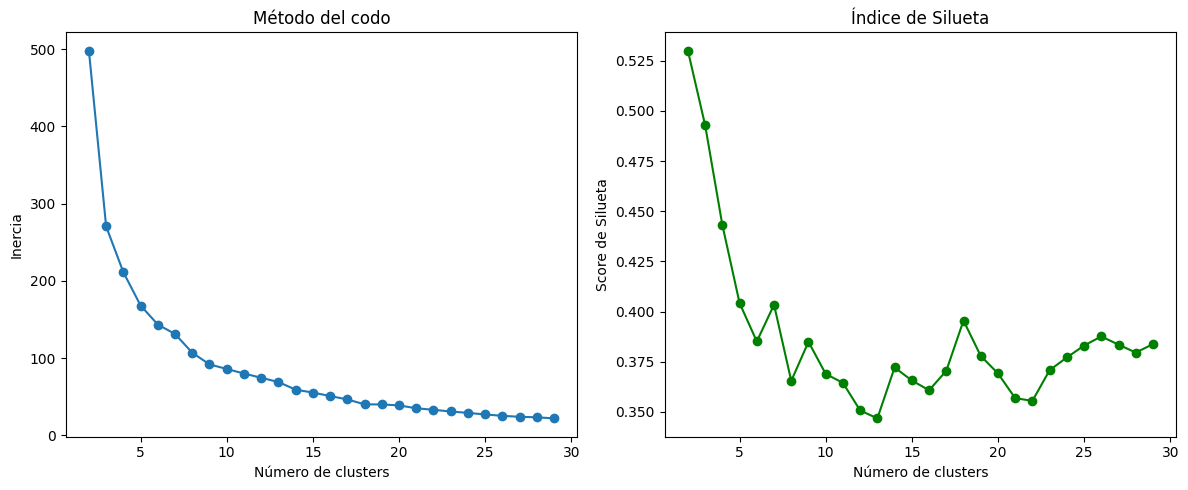

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_range = range(2, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title('Índice de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Score de Silueta')

plt.tight_layout()
plt.show()

A continuación, analizamos los resultados que hemo obtenido al aplicar el método del codo y el índice de la silueta, con el objetivo de determinar cuál es el número óptimo de clusters al utilizar el algoritmo KMeans.

En el gráfico del método del codo, observamos que la inercia disminuye de forma pronunciada hasta aproximadamente 3 o 6 clusters. A partir de ahí, la curva empieza a aplanarse, lo que nos indica que agregar más clusters ya no mejora mucho la calidad de la agrupación. Por eso, este punto se interpreta como un buen equilibrio entre simplicidad del modelo y buena organización de los datos.

En el gráfico del índice de la silueta, vemos que el valor más alto se da cuando usamos 2 clusters (alrededor de 0.525), lo que en teoría indica una separación muy clara entre los grupos. Notamos que con 3 o 4 clusters, el valor de la silueta sigue siendo bastante bueno (cerca de 0.45), lo que nos muestra una buena combinación entre cohesión interna y separación entre grupos. A partir de más de 5 clusters, ese valor baja mucho, lo que significa que la calidad de la agrupación empeora.

Por todo esto, hemos decidimos quedarnos con 3 o 4 clusters, ya que consideramos que es un buen punto medio: por un lado, reduce bastante la inercia según el método del codo, y por otro, mantiene una buena calidad de agrupación según el índice de la silueta. Nos pareció la opción más equilibrada para representar bien la estructura de los datos sin complicar el modelo innecesariamente.

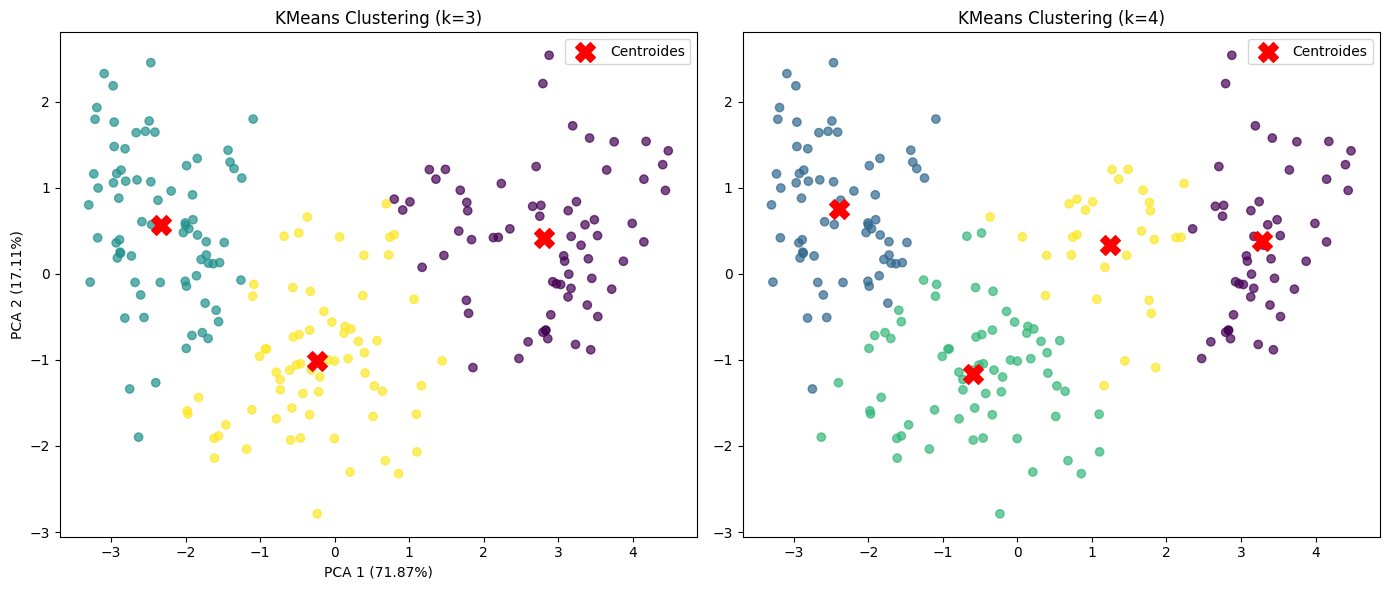

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans con 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(X_pca)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_3, cmap='viridis', alpha=0.7)
axes[0].scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centroides')
axes[0].set_title('KMeans Clustering (k=3)')
axes[0].set_xlabel(f'PCA 1 ({explained_variance[0]:.2%})')
axes[0].set_ylabel(f'PCA 2 ({explained_variance[1]:.2%})')
axes[0].legend()

# KMeans con 5 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(X_pca)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_4, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centroides')
axes[1].set_title('KMeans Clustering (k=4)')
axes[0].set_xlabel(f'PCA 1 ({explained_variance[0]:.2%})')
axes[0].set_ylabel(f'PCA 2 ({explained_variance[1]:.2%})')
axes[1].legend()

plt.tight_layout()
plt.show()

Tras analizar las gráficas correspondientes al método del codo y al índice de silueta para configuraciones de 3 y 4 clusters, hemos optado por utilizar 3 clusters. Esta decisión se fundamenta en que, con esta cantidad, se observa una mejor diferenciación entre los grupos formados.

Aunque el método del codo muestra una ligera mejora en la inercia al pasar de 3 a 4 clusters, esta mejora no resulta significativa. Por otro lado, el índice de silueta presenta un valor promedio ligeramente superior con 3 clusters, lo cual sugiere una mayor cohesión interna y una mejor separación entre los grupos.

Adicionalmente, el análisis visual refuerza esta elección: con 3 clusters se aprecia una separación más clara entre el grupo verde y el amarillo. En cambio, al emplear 4 clusters, surge un nuevo grupo representado por el color amarillo en la misma zona, lo que complica la delimitación visual entre los grupos, especialmente si se intentara trazar una frontera lineal. En contraste, con 3 clusters esta distinción es más evidente.

## HIERARCHICAL CLUSTERING / DENDOGRAMAS


### HIERARCHICAL CLUSTERING

A continuación, aplicamos el método de Hierarchical Clustering, con el objetivo de explorar cómo se agrupan los datos de forma progresiva y analizar qué cantidad de clusters resulta más adecuada.

Para ello, probamos distintas funciones de linkage, que determinan cómo calculamos la distancia entre grupos a medida que se van uniendo. Para ello probaremos Ward, Single, Complete y Average.

La función Ward minimiza la varianza dentro de los clusters y tiende a generar grupos más compactos y equilibrados.
El método Single considera la distancia mínima entre puntos de distintos clusters, lo que puede producir agrupamientos alargados o con formas irregulares.
Complete utiliza la distancia máxima entre puntos, generando clusters más compactos pero también más sensibles a valores extremos.
Y Average toma el promedio de todas las distancias entre puntos de distintos clusters, ofreciendo un término medio entre Single y Complete.

Probamos estas cuatro variantes para comparar cómo se comportan y decidir con cuál obtenemos una mejor segmentación de los datos. Esta comparación no solo nos ayuda a elegir el número adecuado de clusters, sino que también nos permite entender mejor la estructura interna del conjunto de datos desde una perspectiva jerárquica.



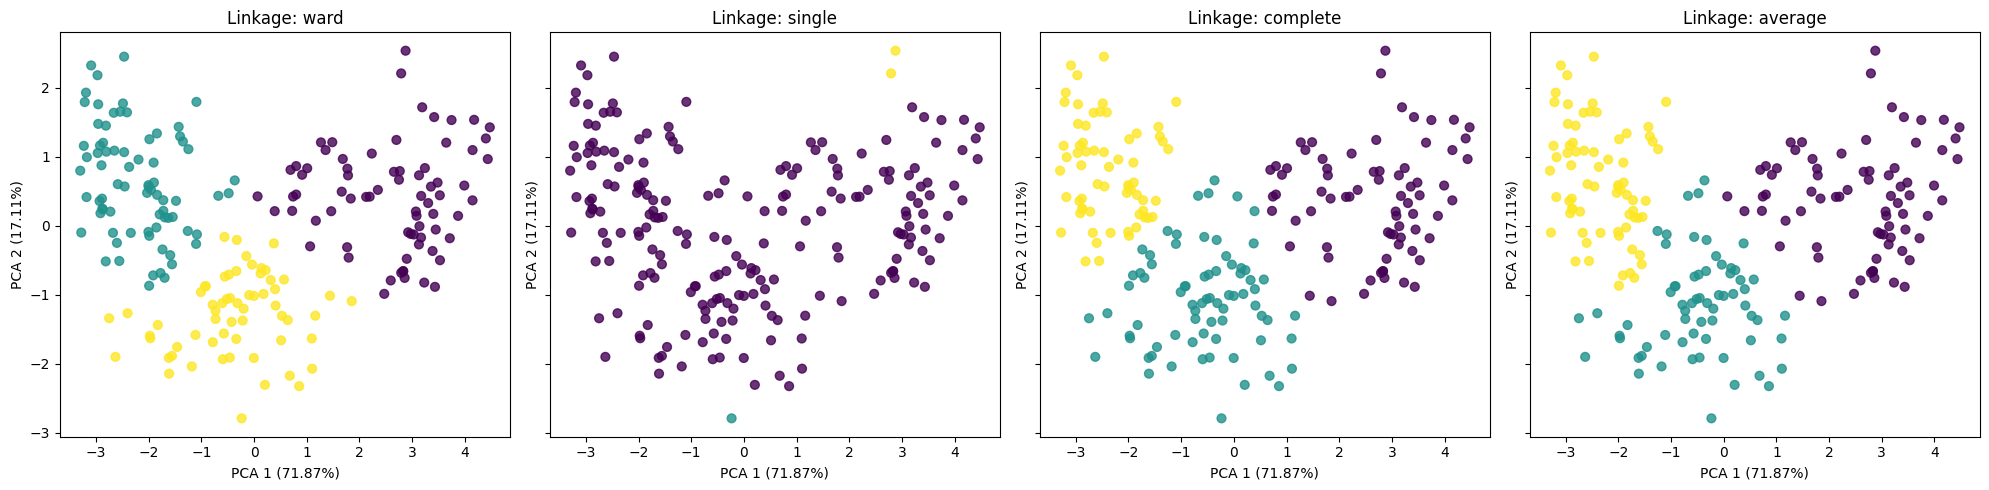

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

linkages = ['ward', 'single', 'complete', 'average']
n_clusters = 3
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

cmap = 'viridis'

for ax, method in zip(axes, linkages):
    if method == 'ward':
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    else:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, metric='euclidean')

    labels_HC = clustering.fit_predict(X_pca)

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_HC, cmap=cmap, s=40, alpha=0.8)
    ax.set_title(f"Linkage: {method}")

    ax.set_xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]:.2%})')
    ax.set_ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]:.2%})')

plt.tight_layout()
plt.show()

Tras analizar las cuatro gráficas obtenidas, podemos extraer algunas conclusiones importantes.

El método Ward destaca por ser muy efectivo, ya que muestra clusters bien definidos, compactos y claramente separados entre sí. Además, minimiza la varianza dentro de los clusters, generando grupos homogéneos y bien diferenciados. Por esta razón, los clusters (verde, amarillo y morado) presentan fronteras claras y bien delimitadas.

Por otro lado, el método Single presenta una segmentación deficiente, con clusters alargados y mezclados. Este es el peor resultado de los cuatro, ya que el Single linkage (vecino más cercano) tiende a generar el efecto “cadena”, donde los clusters se extienden y entrelazan entre sí. Por ello, los puntos morados dominan gran parte del espacio y los clusters no están bien separados, lo que indica una agrupación inadecuada.

En tercer lugar, el método Complete ofrece clusters mejor definidos que Single linkage, aunque en algunas áreas no refleja con precisión la estructura natural de los datos. Esto se debe a que el Complete linkage (vecino más lejano) produce clusters más compactos que Single, pero menos naturales que Ward, por lo que consideramos este resultado como intermedio.

Finalmente, el método Average muestra resultados muy similares a los de Ward. Sin embargo, hemos decidido optar por Ward, ya que consideramos que permite una separación visual ligeramente más clara entre los clusters morado y verde, facilitando así su interpretación.

### DENDOGRAMA

A continuación, realizamos un dendrograma utilizando el método Ward para visualizar la estructura jerárquica de los clusters. Este gráfico nos permite observar cómo los datos se agrupan progresivamente, fusionándose en grupos cada vez más grandes a medida que avanza el proceso de agrupamiento.

El dendrograma es especialmente útil porque ofrece una representación visual clara de las distancias a las que se unen los clusters. Al analizarlo, podemos identificar el punto en el que la distancia entre los grupos fusionados aumenta de forma significativa, lo que indica una mayor diferencia entre ellos. Este punto es clave para determinar el número adecuado de clusters, seleccionando el nivel de corte en el que la fusión deja de ser homogénea.

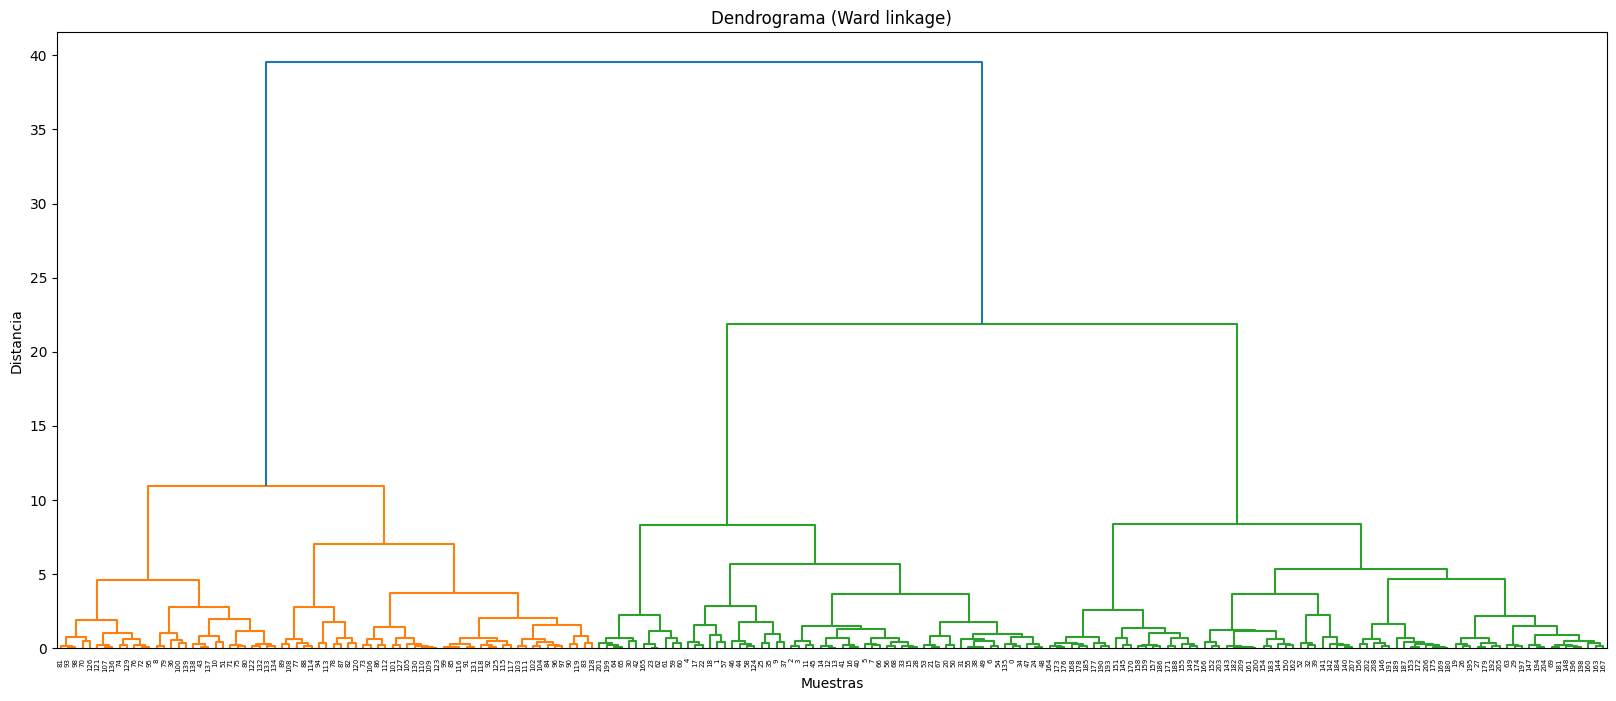

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrograma
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrograma (Ward linkage)')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

En el dendrograma podemos distinguir claramente dos grandes grupos principales, uno en naranja y otro en verde, que se unen a una distancia bastante alta, alrededor de 40.

Para determinar el número óptimo de clusters, identificamos los saltos significativos en la altura de fusión. Observamos un salto muy grande cerca de la distancia 40, que corresponde a la separación entre estos dos grandes grupos principales.

Además, detectamos otro salto importante alrededor de la distancia 20-22 y un cambio adicional en la altura de fusión entre 10 y 11.

A partir de este análisis, justificamos la elección de 4 clusters haciendo un corte horizontal entre las distancias 10 y 15. De esta manera, el grupo naranja se divide en dos subgrupos principales, y el grupo verde también se divide en dos subgrupos, resultando en un total de 3 clusters bien diferenciados.

La gran separación entre los dos grupos principales indica que son fundamentalmente diferentes, mientras que las divisiones internas dentro de cada grupo reflejan subgrupos con características similares entre sí, pero distintas respecto a los otros grupos.

En cuanto a la homogeneidad interna y separación externa, estos 3 clusters representan un buen equilibrio, mostrando cohesión dentro de cada grupo y diferencias claras entre ellos.

## DBSCAN

A continuación, realizamos un análisis con el método DBSCAN, que nos permite identificar clusters basados en la densidad de los datos. Para ello, es fundamental ajustar dos parámetros clave, eps y minPts.

El parámetro eps define la distancia máxima dentro de la cual consideramos que los puntos son vecinos, mientras que minPts establece la cantidad mínima de puntos que deben estar dentro de ese radio para que un punto se considere núcleo de un cluster.

Ajustamos estos parámetros probando diferentes valores para observar cómo afectan la formación de clusters y la cantidad de puntos considerados ruido.

Hay que tener en cuenta que si eps es muy pequeño, muchos puntos quedan aislados y no se forman clusters significativos, y si es demasiado grande, los clusters pueden volverse demasiado extensos y perder precisión.

En cuanto a minPts, valores bajos pueden generar clusters con poca densidad, mientras que valores altos requieren agrupamientos más densos, dejando más puntos como ruido.

Por ello variamos ambos parámetros y evaluamos los resultados para encontrar un equilibrio que permita obtener una segmentación clara y representativa de los datos, reflejando adecuadamente su estructura interna.

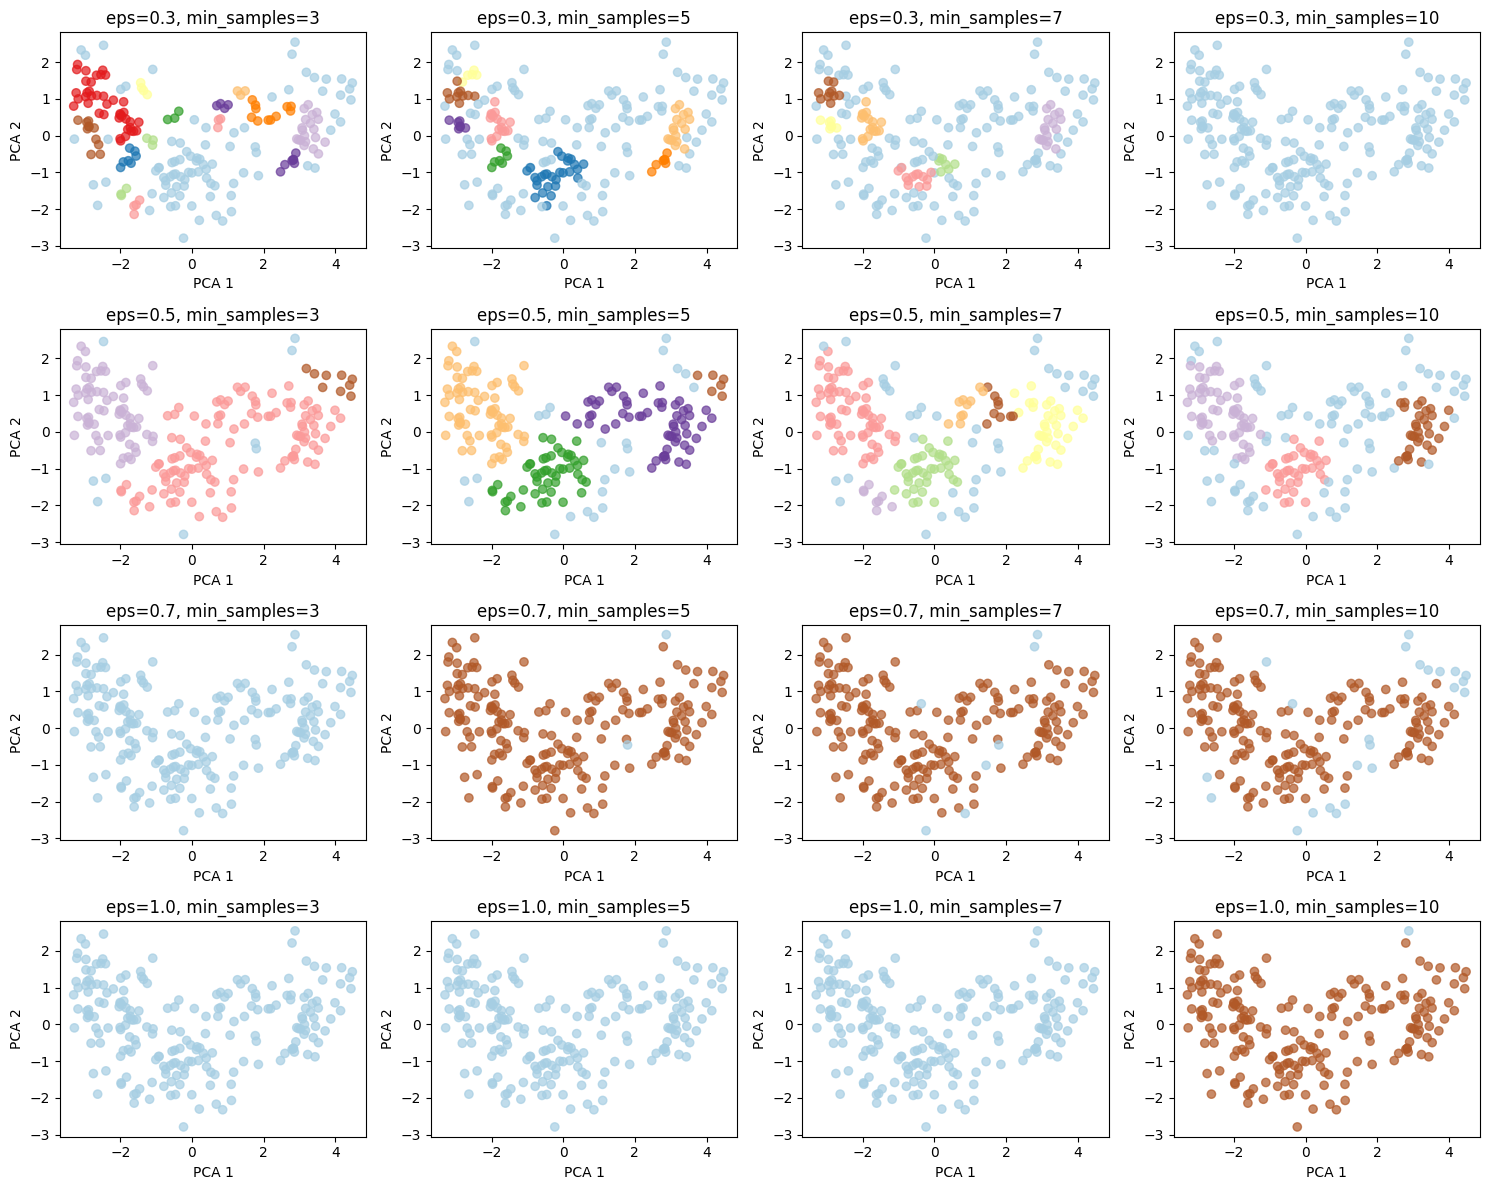

In [8]:
from sklearn.cluster import DBSCAN

# Aplicamos DBSCAN
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7, 10]

# Configuración del gráfico
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

# Iteramos por todas las combinaciones de eps y min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):

        # Aplicamos DBSCAN con los valores actuales de eps y min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = dbscan.fit_predict(X_pca)

        # Graficamos los resultados en el subgráfico correspondiente
        ax = axes[i, j]
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='Paired', alpha=0.7)
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PCA 1')
        ax.set_ylabel('PCA 2')

# Ajustamos el espacio entre los gráficos
plt.tight_layout()
plt.show()

Una vez analizadas todas las gráficas, podemos concluir que el valor ideal para eps es 0.5, ya que es el que permite una formación clara y adecuada de los clusters.

Habiendo elegido eps = 0.5, el siguiente paso es determinar el valor más adecuado para min_samples, con el fin de lograr el mejor ajuste conjunto de ambos parámetros.

Al comparar los resultados, observamos que para min_samples, los valores 3 y 5 muestran un mejor poder de distinción en comparación con los valores 7 y 10. Sin embargo, entre estos dos, el valor 5 destaca porque presenta menos puntos sin clasificar y los clusters se pueden diferenciar un poco mejor, gracias a que las líneas que actúan como fronteras entre ellos son más claras y definidas.

Por estas razones, el valor min_samples = 5 es la opción más adecuada para nuestro análisis.



Esta conclusión se refuerza aún más al observar la siguiente gráfica.

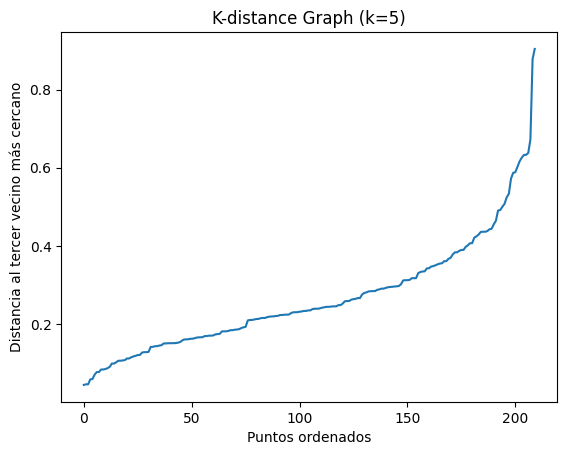

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Para elegir eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = sorted(distances[:, 2])
plt.plot(distances)
plt.title('K-distance Graph (k=5)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al tercer vecino más cercano')
plt.show()

Como se puede apreciar en esta gráfica, a partir de un valor cercano a 0.5, el comportamiento de la distancia muestra un cambio claro en su pendiente. Este punto de inflexión, junto con la información proporcionada por las gráficas anteriores, nos confirma que un valor de eps = 0.5 es el más adecuado para nuestro análisis junto con un min_samples de 3.

# ANÁLISIS

## Mejores valores para cada método

In [10]:
# KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

df_kmeans = X.copy()
df_kmeans['Cluster'] = kmeans_labels


# Clustering jerárquico con el método Ward y 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_pca)

df_jerarquico = X.copy()
df_jerarquico['Cluster'] = hierarchical_labels

# DBSCAN con eps=0.5 y min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_pca)

df_dbscan = X.copy()
df_dbscan['Cluster'] = db_labels

## Comparación Visual de los Métodos de Clustering

Tras aplicar los tres métodos de clustering a los datos transformados con PCA usando el scaler estándar, observamos que:


*   K-Means produjo una separación clara pero rígida de los clusters, formando fronteras esféricas que no capturan completamente la estructura natural de los datos. Algunos puntos en los bordes entre clusters parecen estar mal asignados.

*   Clustering Jerárquico con linkage ward mostró una estructura más orgánica, identificando bien los grupos naturales visibles en la proyección 2D. El dendrograma reveló 3 clusters principales que coinciden con agrupaciones visibles.

*   DBSCAN identificó correctamente los clusters más densos, pero marcó como outliers muchos puntos en regiones de densidad intermedia. Esto puede ser ventajoso para detectar anomalías, pero menos útil para una agrupación exhaustiva.


Conclusión visual: El clustering jerárquico con linkage ward parece capturar mejor la estructura subyacente de los datos, seguido de cerca por K-Means.

## Relación entre Clusters y Clases Originales

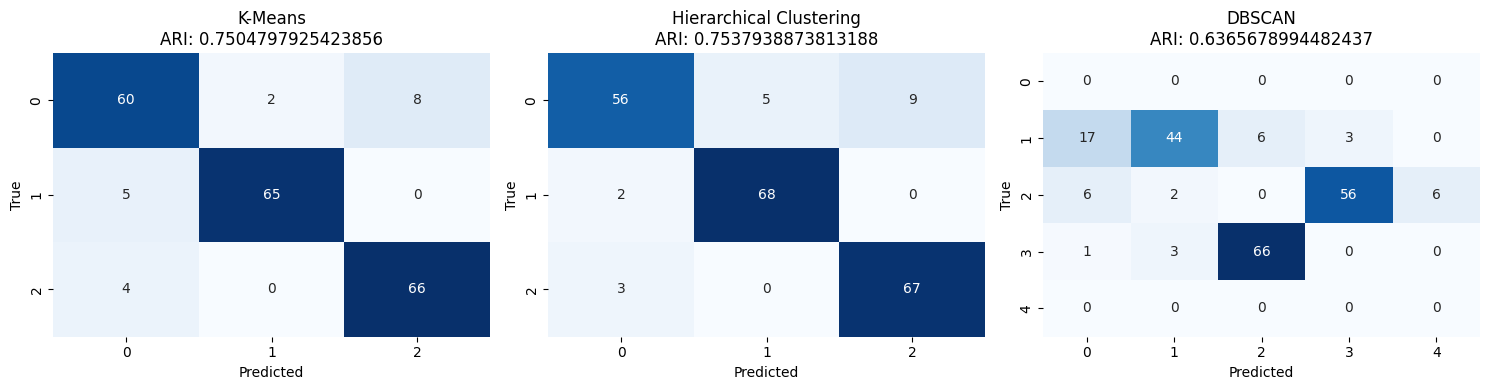

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# Ajuste de etiquetas
clases_reales = data['clase'].values - 1
hierarchical_labels_ajustados = (hierarchical_labels + 1) % 3
kmeans_labels_ajustados = (kmeans_labels + 1) % 3
db_labels_ajustados = db_labels

# Preparar datos
modelos = [
    ("K-Means", kmeans_labels_ajustados),
    ("Hierarchical Clustering", hierarchical_labels_ajustados),
    ("DBSCAN", db_labels_ajustados)
]

# Crear figura con subplots en horizontal
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas

for ax, (nombre, etiquetas) in zip(axes, modelos):
    cm = confusion_matrix(clases_reales, etiquetas)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ari = adjusted_rand_score(clases_reales, etiquetas)
    ax.set_title(f"{nombre}\nARI: {ari}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


Como se puede ver la suposicion de que el cluster jerárquico era el mejor es correcta, esto se debe a que hay mas valores correctamente clasificados que en el resto de métodos. Esto se aprecia claramente en las matrices de confusión.

Queremos destacar que para que se viesen los valores en la diagonal de la matriz de confusión hemos tenido que ajustar las clases con sumas y modulos, ya que dividía vien las clases pero le asignaba otro numero que no coincidia con los datos del excel. Este problema era maás difícil de solucionar en el DB_scan ya que hace 5 clases diferentes en vez de 3. De todas formas en el valor calculado ajusted_rand_score no importa que estas clases no coincidan, simplemete era para verlo visualmente más atractivo en la diagonal de la matriz. A continuación, imprimimos un ejemplo de este problema:

In [16]:
print(hierarchical_labels)
print()
print(clases_reales)

[2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 0
 2 2 1 2 2 2 0 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


##  Interpretación de las variables usando boxplots

Boxplots para KMeans:


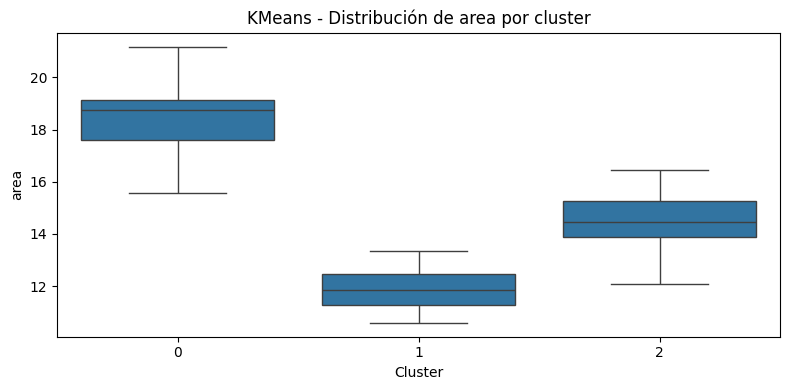

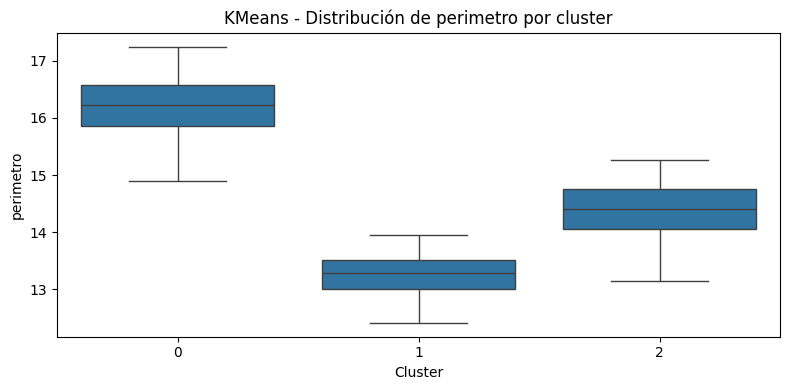

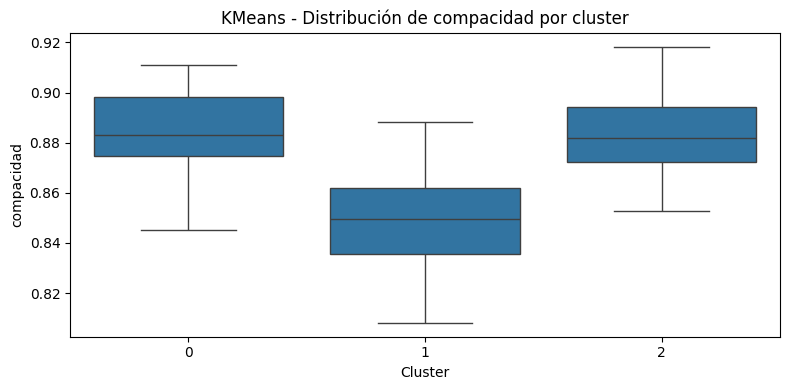

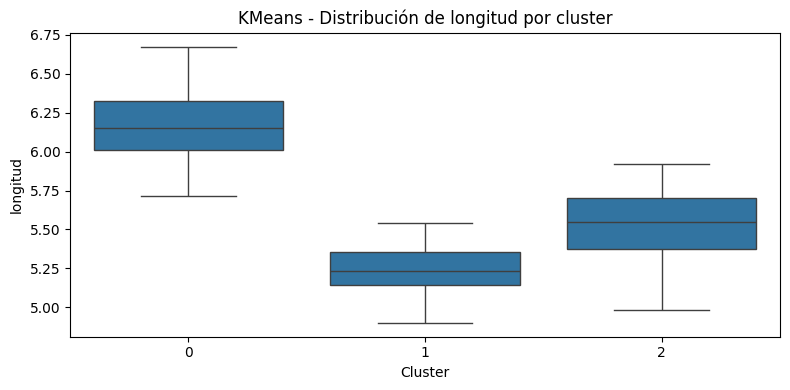

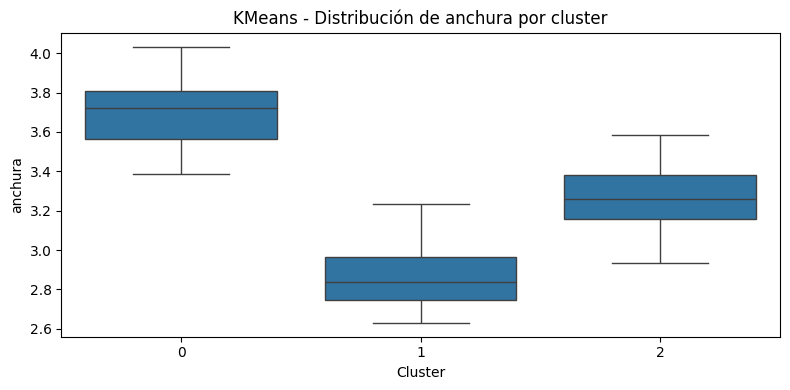

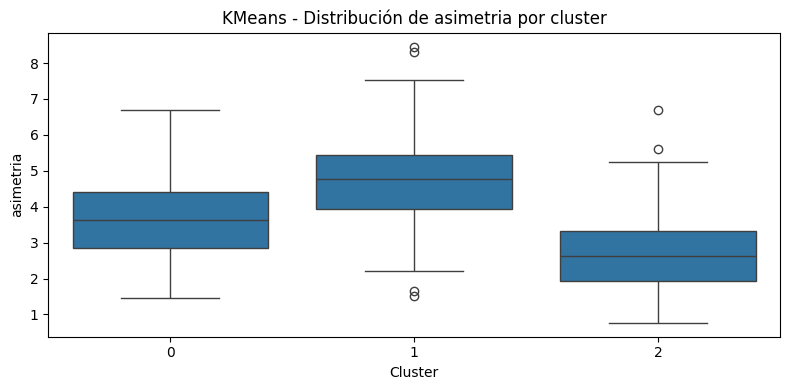

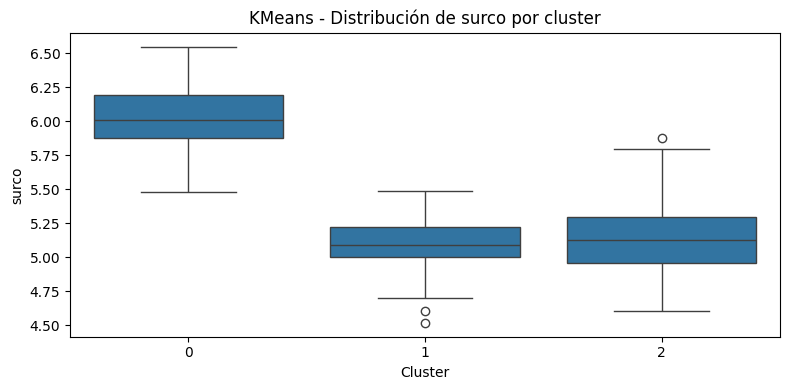

Boxplots para Clustering Jerárquico:


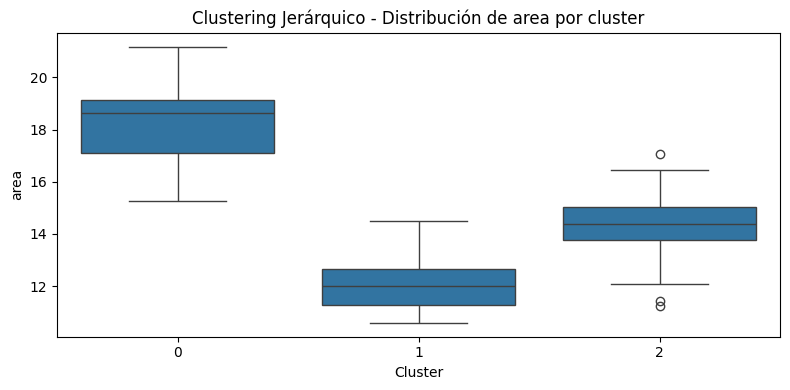

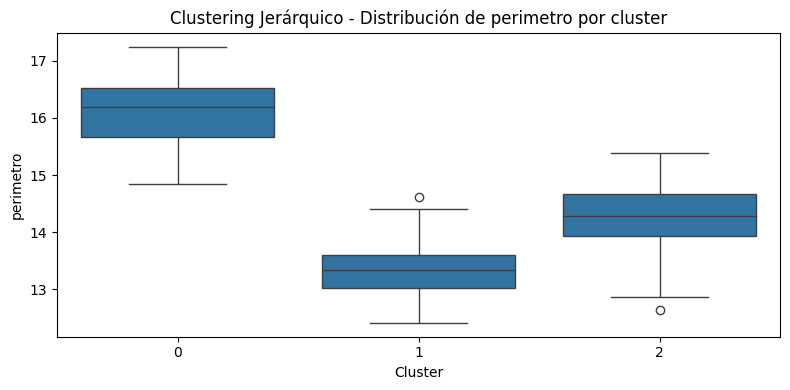

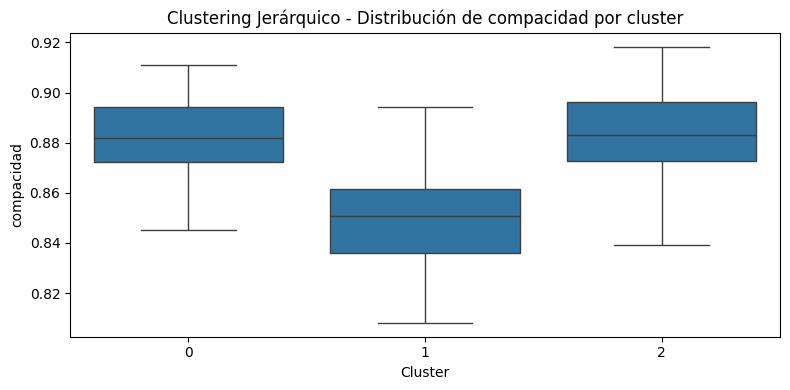

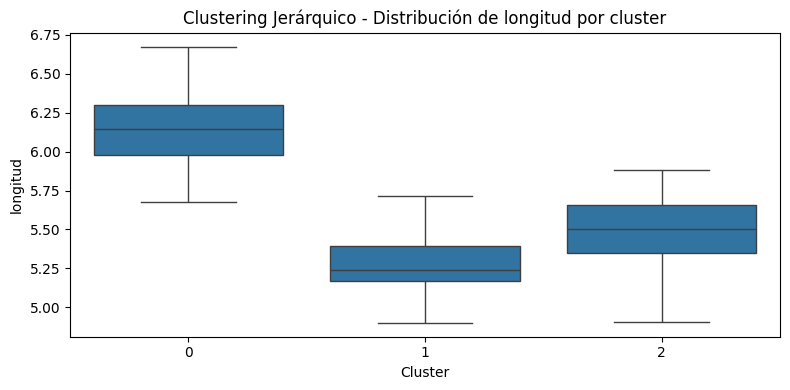

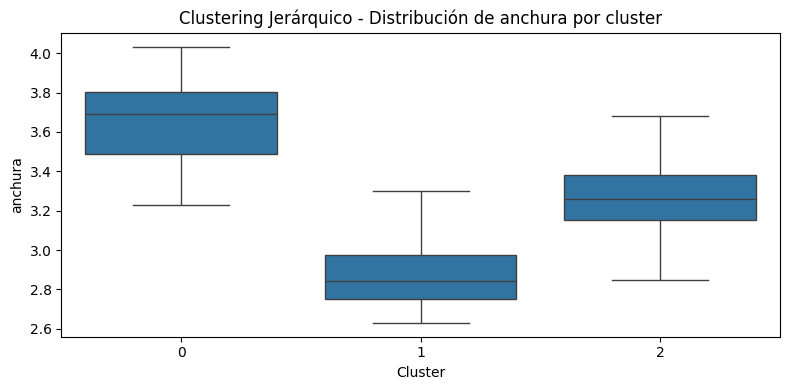

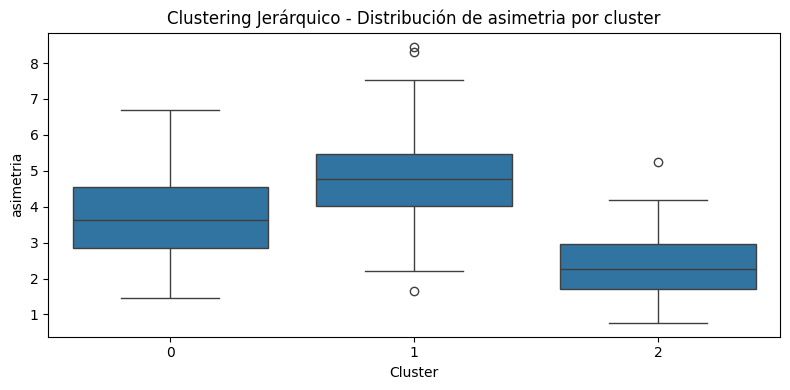

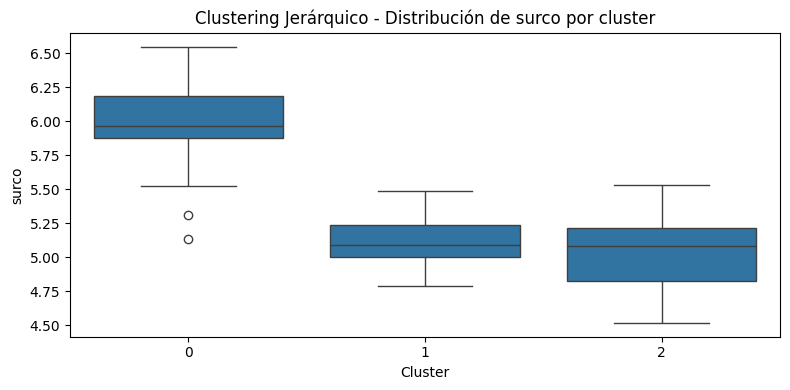

Boxplots para DBSCAN:


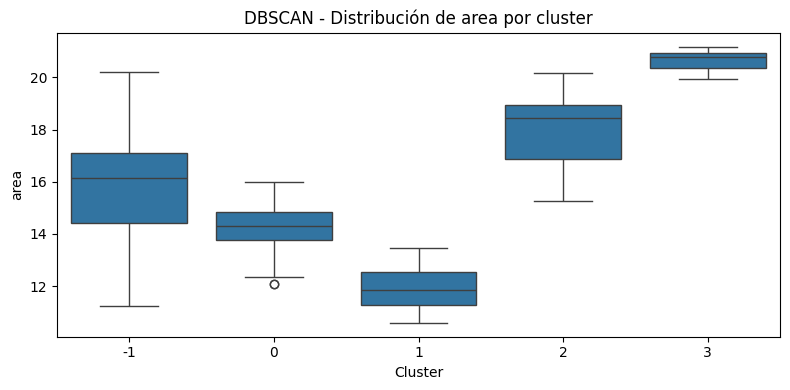

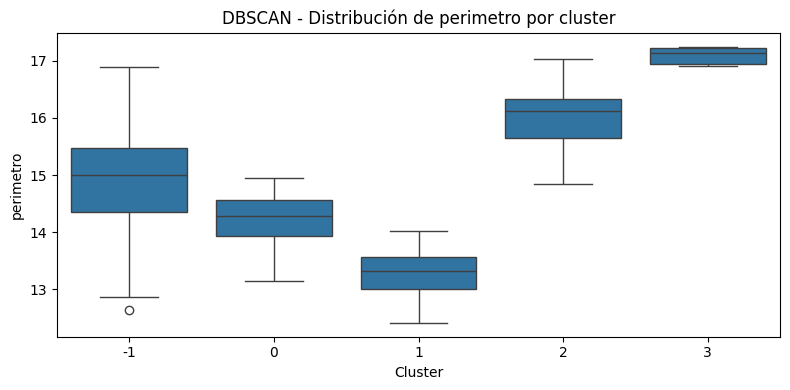

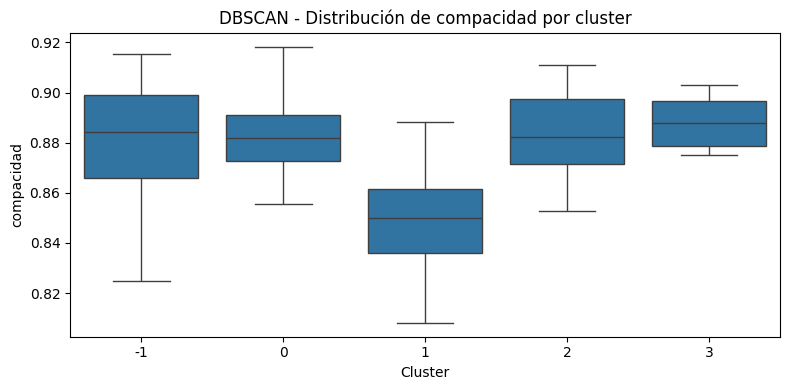

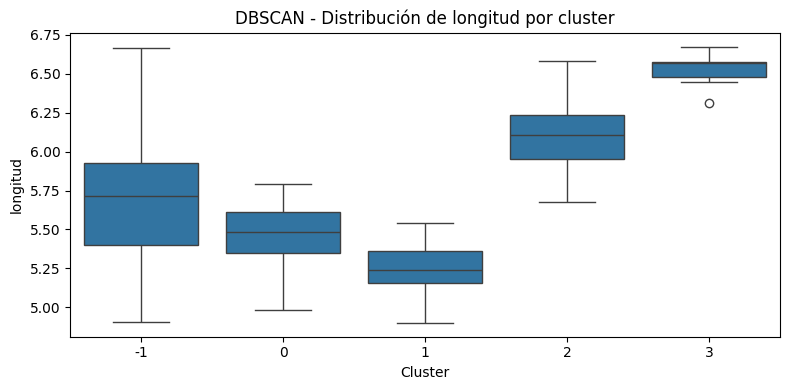

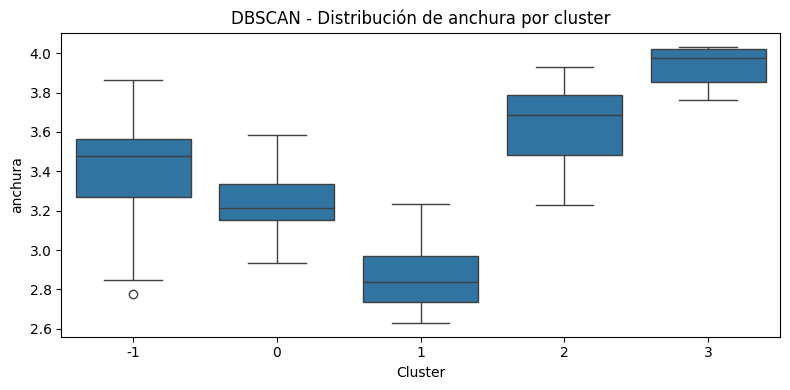

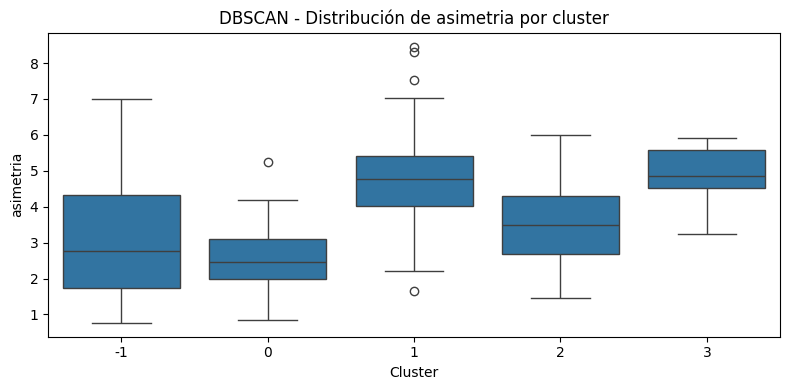

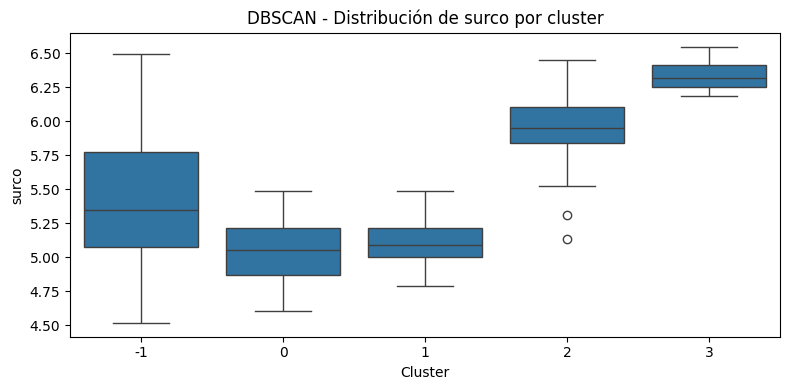

In [12]:
import seaborn as sns


# Lista de variables para graficar (todas las columnas de X)
variables = X.columns

# Función para graficar los boxplots por método
def generar_boxplots(df, metodo):
    for column in variables:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Cluster', y=column, data=df)
        plt.title(f'{metodo} - Distribución de {column} por cluster')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

# Generar los boxplots por cada método
print("Boxplots para KMeans:")
generar_boxplots(df_kmeans, "KMeans")

print("Boxplots para Clustering Jerárquico:")
generar_boxplots(df_jerarquico, "Clustering Jerárquico")

print("Boxplots para DBSCAN:")
generar_boxplots(df_dbscan, "DBSCAN")


Para concluir, analizamos las diferentes variables para cada uno de los métodos.

Con el fin de evitar redundancias en la exposición del criterio de análisis en cada gráfica, nos centraremos principalmente en evaluar si los valores de las variables permiten una adecuada clasificación dentro de los distintos clústeres, sin que exista ambigüedad o incertidumbre respecto a la pertenencia de un valor a un clúster u otro.

K-MEANS:


*   Distrubición de área: Es una variable relevante ya que cada cluster tiene bien aislados sin posibles valores.

*   Distribución de perímetro: Al igual que el área es una variable relevante ya que los valores no se solapan.

*   Distribución de compacidad: En este caso esta variable no es determinante ya que para el cluster 0 y 2, muchos por no decir todos los valores puede caen en un cluster u otro.

*   Distrución de longitud: No sucecede como con la compacidad, pero igualmente entre el cluster 1 y 2 los valores están excesivamente concatenados lo que puede hacer que algun valor atípico entre en el cluster equivocado.

*   Distribución por anchura: En este caso volvemos a ver una variable donde los valores están bien diferenciados, por lo que determinamos que es relevante.

*   Distribución por asimetría: Esta es una de las peores variables para el método K-MEANS, ya que no solo están todos los cluters en el mismo rango de valores, si no que encima hay algunos valores muy extremos.

*   Distribución de surco: Esta es la última variable que miraremos para este método. Como ser observa, también es de las peores. Esto se debe a que el cluster 1 y 2 comparten casi todos los mismo valores y además el cluster 1 tiene varios valores extremos.

Clustering Jerárquico:


*   Distrubición de área:  Se trata de una variable altamente relevante, ya que presenta valores claramente diferenciados entre los clústeres. El clúster 0 agrupa los valores más altos, el clúster 1 los más bajos y el clúster 2 contiene valores intermedios, con una superposición mínima entre ellos.

*   Distribución de perímetro: Al igual que el área, esta variable resulta relevante, ya que permite una adecuada separación entre los clústeres. Si bien se observa una ligera superposición entre los clústeres 1 y 2, la mayoría de los valores se distribuyen de manera clara dentro de su grupo correspondiente.

*   Distribución de compacidad: En este caso, la variable resulta menos determinante, ya que los clústeres 0 y 2 presentan rangos de valores muy similares, lo cual puede generar clasificaciones incorrectas. No obstante, el clúster 1 se distingue con mayor claridad al presentar valores significativamente más bajos.

*   Distrución de longitud: Esta variable presenta una buena separación para el clúster 0; sin embargo, se observa cierta superposición entre los clústeres 1 y 2, lo que podría conducir a clasificaciones incorrectas entre estos dos grupos.

*   Distribución por anchura: En este caso, nuevamente se observa una variable cuyos valores están bien diferenciados, especialmente en el clúster 0. Aunque los clústeres 1 y 2 presentan cierta superposición, sus rangos de valores se mantienen mayoritariamente distintos.

*   Distribución por asimetría: Esta es una de las variables más problemáticas para el análisis mediante clustering jerárquico. Si bien los centroides de los clústeres difieren entre sí, se observa un elevado solapamiento de valores, así como la presencia de varios valores atípicos, particularmente en el clúster 1.

*   Distribución de surco: Para finalizar, esta variable vuelve a mostrar una relevancia limitada, ya que los clústeres 1 y 2 comparten gran parte de su rango de valores. Además, el clúster 0 presenta algunos valores extremadamente atípicos, lo que dificulta una clasificación precisa.


DBSCAN:

*   Distrubición de área: Esta variable resulta altamente relevante para este método, ya que exhibe una clara separación entre los clústeres. El clúster 2 agrupa los valores más altos (20-21), el clúster 1 incluye valores altos-intermedios (16-19), el clúster 1 abarca valores intermedios-bajos (12-17), y los clústeres -1 y 3 contienen los valores más bajos (12-15). Además, se observa un valor atípico en el clúster 3.

*   Distribución de perímetro: Esta variable también demuestra una alta relevancia, con clústeres claramente diferenciados. El clúster 3 presenta los perímetros más altos (17-17.2), seguido por el clúster 1 (15-16.5), el clúster 0 (14-15.5), y los clústeres -1 y 3 con los valores más bajos (13-14.5). Aunque se identifica un valor extremo en el clúster 0, este no representa un problema significativo para la clasificación.

*   Distribución de compacidad: En este caso, esta variable resulta significativamente menos determinante. El clúster 3 presenta los valores más bajos (0.82-0.88), mientras que los clústeres -1, 0, 1 y 2 muestran rangos de valores bastante similares y solapados (0.86-0.91). Esta superposición puede dar lugar a clasificaciones erróneas si se considera únicamente esta variable.

*   Distrución de longitud: EEsta variable muestra una buena separación entre los clústeres. El clúster 2 presenta los valores más altos (6.5-6.6), seguido por el clúster 1 (5.75-6.25), el clúster 0 (5.5-6), y los clústeres -1 y 3 con los valores más bajos (5-5.75). Se observa un valor atípico en el clúster 2.

*   Distribución por anchura: En este caso, se observa nuevamente una variable con valores bien diferenciados. El clúster 2 presenta los valores más altos (3.8-4), seguido por el clúster 1 (3.4-3.9), el clúster 0 (3.2-3.6), el clúster -1 (3-3.6) y el clúster 4 con los valores más bajos (2.7-3.2). Aunque se identifica un valor atípico en el clúster 0, este no representa un problema significativo.

*   Distribución por asimetría: Esta es una de las variables más problemáticas para el método DBSCAN. El clúster 3 presenta los valores más altos (3-8), con un valor extremo de 8. El clúster 2 también muestra valores relativamente altos (4-6), mientras que los clústeres -1, 0 y 1 tienen rangos de valores muy solapados (1-6). Además, se identifican varios valores atípicos que podrían dificultar la clasificación.

*   Distribución de surco: Por tercera vez, esta variable resulta poco efectiva. Los clústeres -1 y 0 presentan un alto grado de solapamiento, y además, en el clúster 1 se observan un par de valores extremadamente atípicos que deberían pertenecer a otro clúster.